In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c9d104986a45196b5479e5b5b96af15d87d18c52425fbf301983f70189d88239
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [5]:
# 再現性確保

import os
import random
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [6]:
# データクリーニング

'''

%cd /content/drive/MyDrive/assignment-main(new)/Trainee/time-series-prediction

df = pd.read_csv('/content/drive/MyDrive/assignment-main(new)/Trainee/time-series-prediction/stock_price.csv')

def parse_volume(s):
  if 'B' in s:
    return float(s.replace('B', '')) * 1e9
  elif 'M' in s:
    return float(s.replace('M', '')) * 1e6
  else:
    return float(s)

def clean(df):
  df_new = df.copy()
  df_new = df_new[::-1]
  df_new = df_new.rename(columns={'日付け': 'date', '終値': 'close', '始値': 'open', '高値': 'high', '安値': 'low', '出来高': 'volume', '変化率 %': 'return'})
  df_new['date'] = pd.to_datetime(df_new['date'])
  df_new = df_new.set_index('date')
  df_new['volume'] = df_new['volume'].apply(parse_volume)
  df_new['return'] = df_new['return'].str.replace('%', '').astype(float) / 100
  return df_new

cleaned_df = clean(df)


from google.colab import files
cleaned_df.to_csv('my_cleaned_stock_price.csv')
files.download('my_cleaned_stock_price.csv')

'''

"\n\n%cd /content/drive/MyDrive/assignment-main(new)/Trainee/time-series-prediction\n\ndf = pd.read_csv('/content/drive/MyDrive/assignment-main(new)/Trainee/time-series-prediction/stock_price.csv')\n\ndef parse_volume(s):\n  if 'B' in s:\n    return float(s.replace('B', '')) * 1e9\n  elif 'M' in s:\n    return float(s.replace('M', '')) * 1e6\n  else:\n    return float(s)\n\ndef clean(df):\n  df_new = df.copy()\n  df_new = df_new[::-1]\n  df_new = df_new.rename(columns={'日付け': 'date', '終値': 'close', '始値': 'open', '高値': 'high', '安値': 'low', '出来高': 'volume', '変化率 %': 'return'})\n  df_new['date'] = pd.to_datetime(df_new['date'])\n  df_new = df_new.set_index('date')\n  df_new['volume'] = df_new['volume'].apply(parse_volume)\n  df_new['return'] = df_new['return'].str.replace('%', '').astype(float) / 100\n  return df_new\n\ncleaned_df = clean(df)\n\n\nfrom google.colab import files\ncleaned_df.to_csv('my_cleaned_stock_price.csv')\nfiles.download('my_cleaned_stock_price.csv')\n\n"

In [7]:
df = pd.read_csv('/content/drive/MyDrive/assignment-main(new)/Trainee/time-series-prediction/my_cleaned_stock_price.csv')
df

,date,close,open,high,low,volume,return
0,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,0.1625
1,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-0.0543
2,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,0.0174
3,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,0.0393
4,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,0.0482
...,...,...,...,...,...,...,...
9197,2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.0013
9198,2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,0.0114
9199,2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.0063
9200,2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,0.0107


In [8]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,close,open,high,low,volume,return
date,,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,0.1625
1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-0.0543
1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,0.0174
1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,0.0393
1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,0.0482
...,...,...,...,...,...,...
2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.0013
2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,0.0114
2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.0063


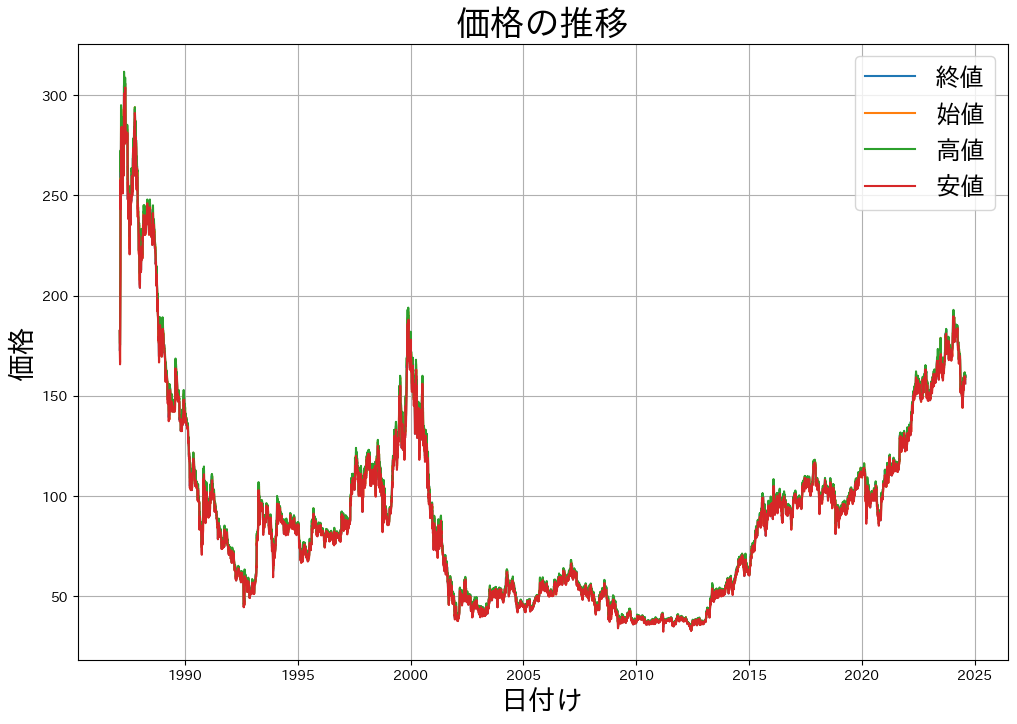

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df['close'], label='終値')
plt.plot(df['open'], label='始値')
plt.plot(df['high'], label='高値')
plt.plot(df['low'], label='安値')
plt.title('価格の推移', fontsize=25)
plt.xlabel('日付け', fontsize=20)
plt.ylabel('価格', fontsize=20)
plt.legend(fontsize=18)
plt.grid()
plt.show()



*   年代によってトレンドが異なる
*   2019年以降は上昇トレンド
→2019年以降のデータをモデル構築に利用


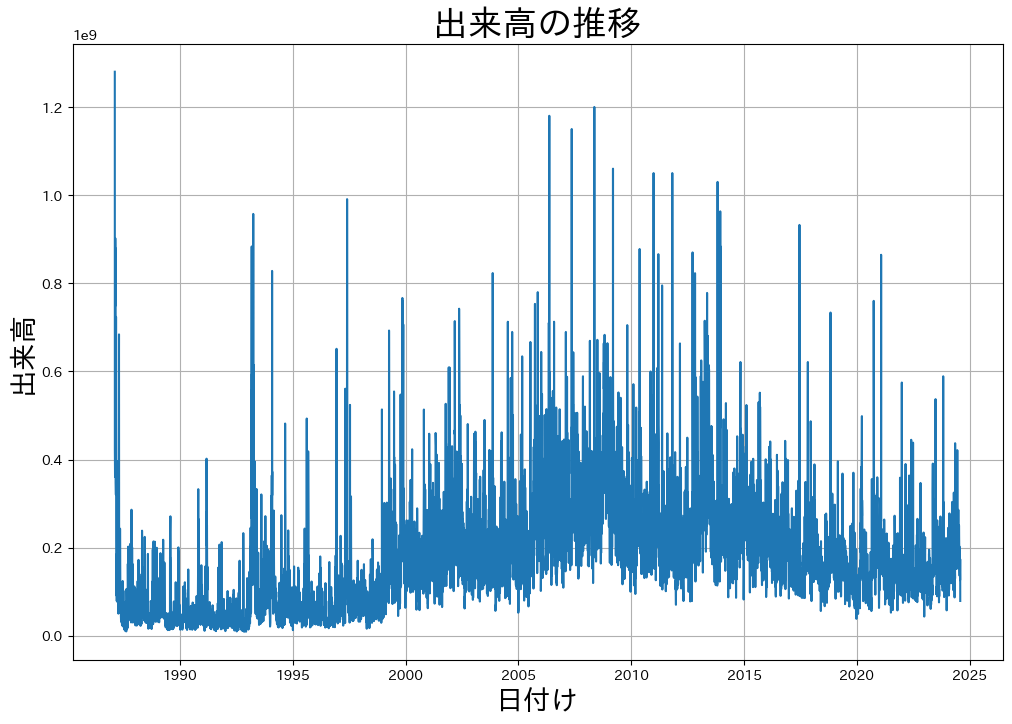

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(df['volume'], label='出来高')
plt.title('出来高の推移', fontsize=25)
plt.xlabel('日付け', fontsize=20)
plt.ylabel('出来高', fontsize=20)
plt.grid()
plt.show()

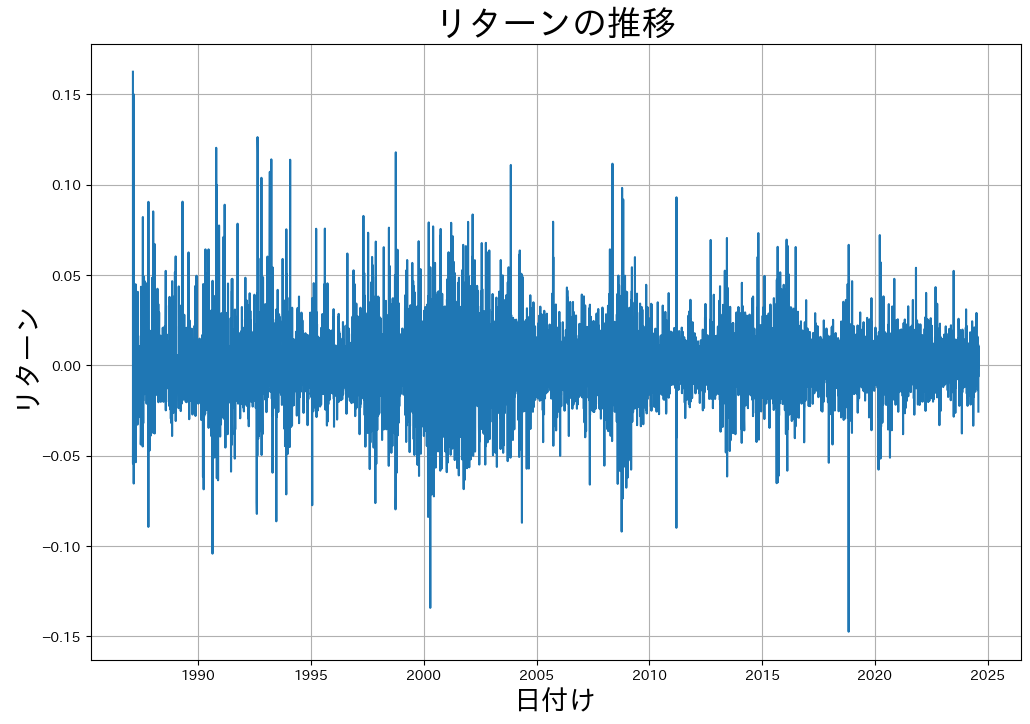

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(df['return'], label='リターン')
plt.title('リターンの推移', fontsize=25)
plt.xlabel('日付け', fontsize=20)
plt.ylabel('リターン', fontsize=20)
plt.grid()
plt.show()

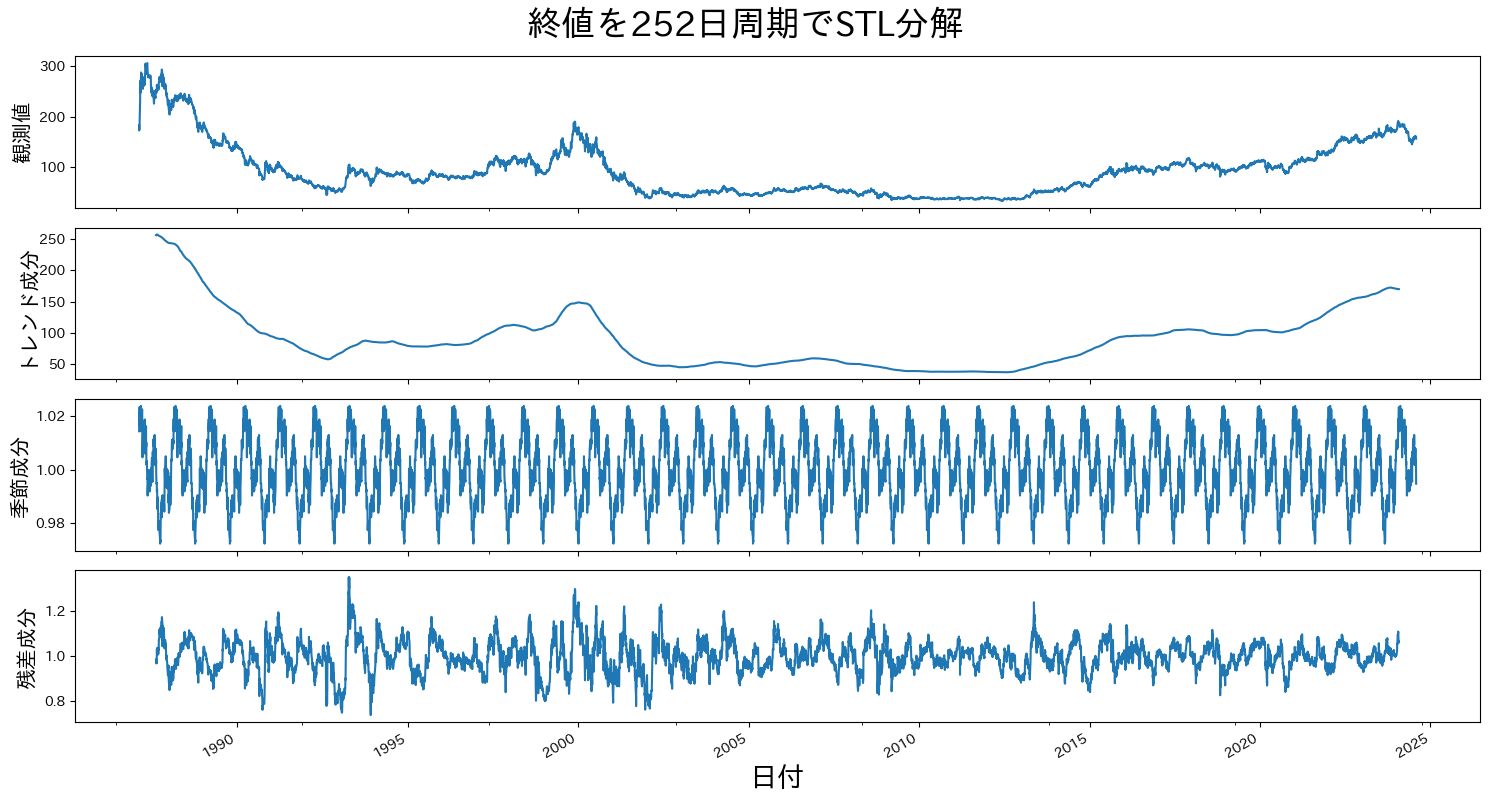

季節性成分の強さ: 0.02917421166888201


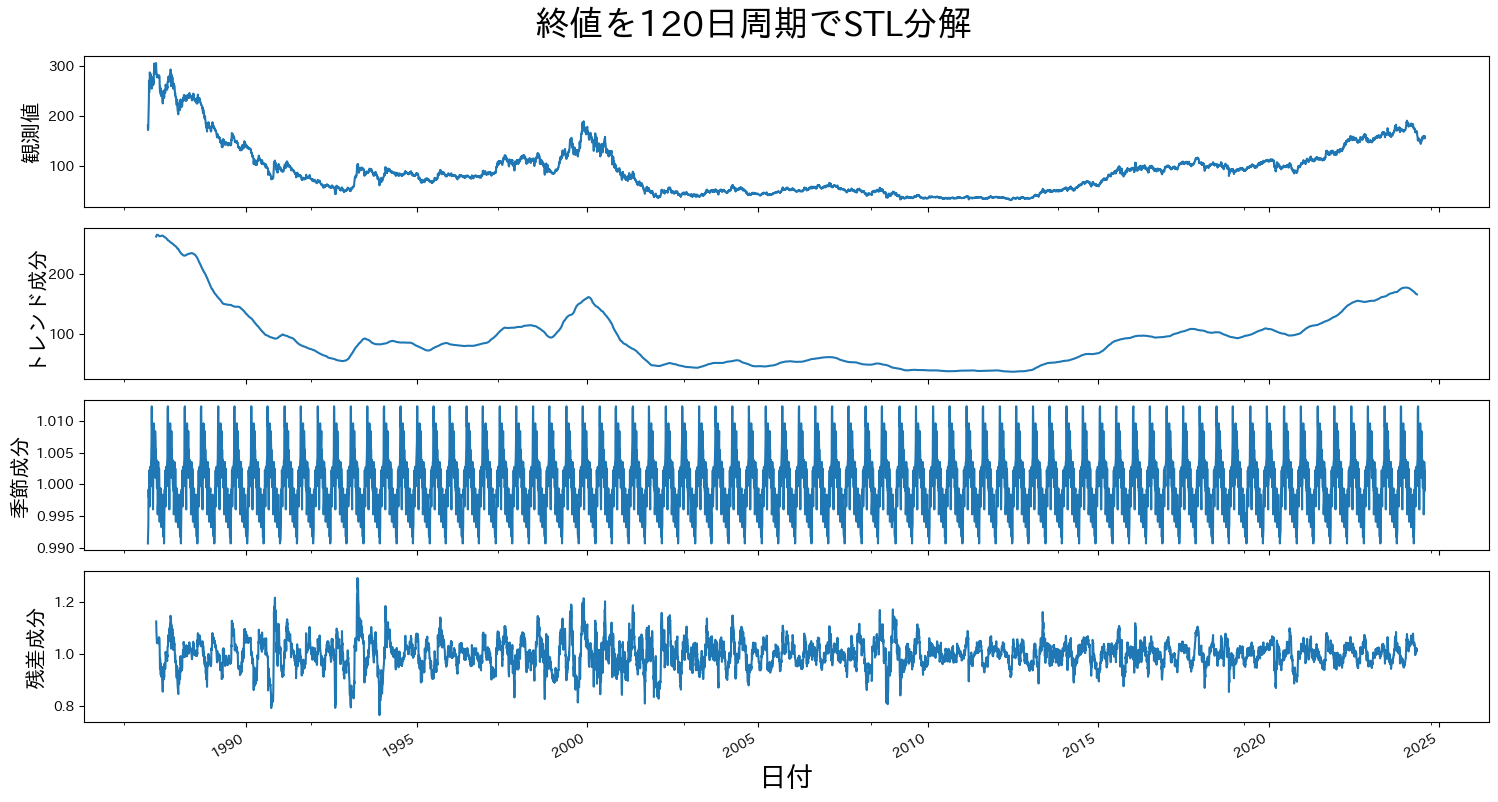

季節性成分の強さ: 0.008174131354171554


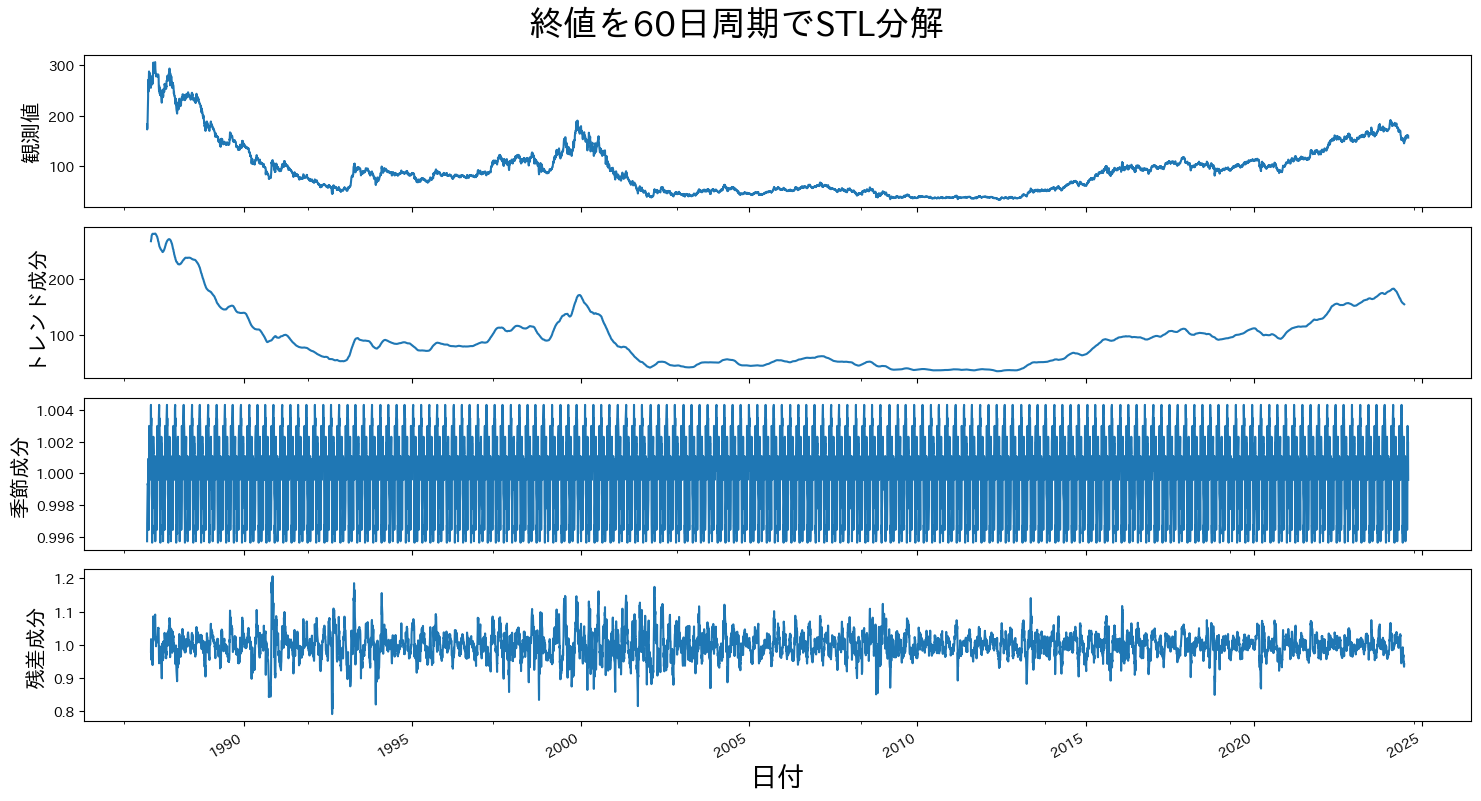

季節性成分の強さ: 0.003250269007547879


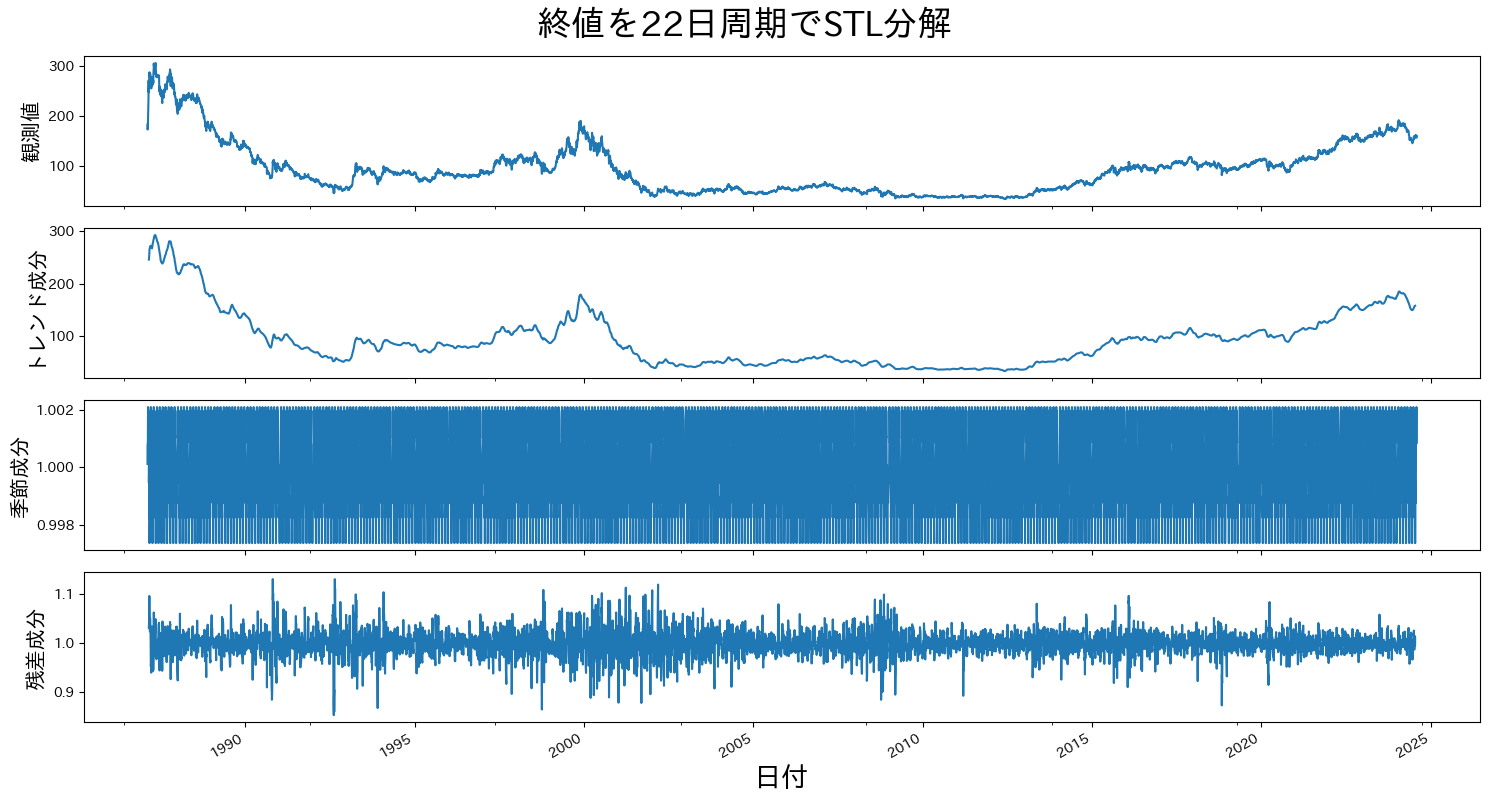

季節性成分の強さ: 0.0026754402218510664


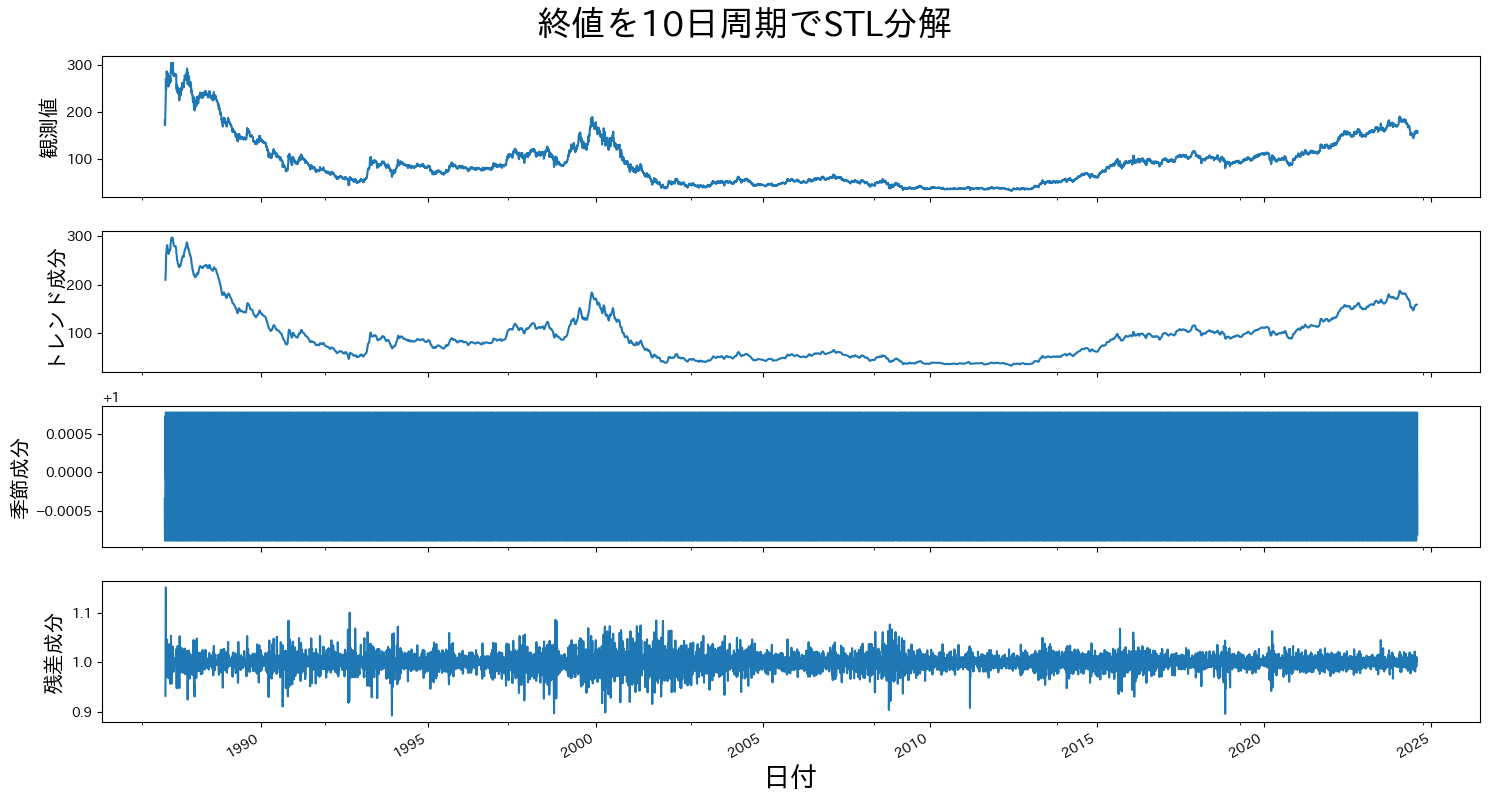

季節性成分の強さ: 0.0010055963485804398


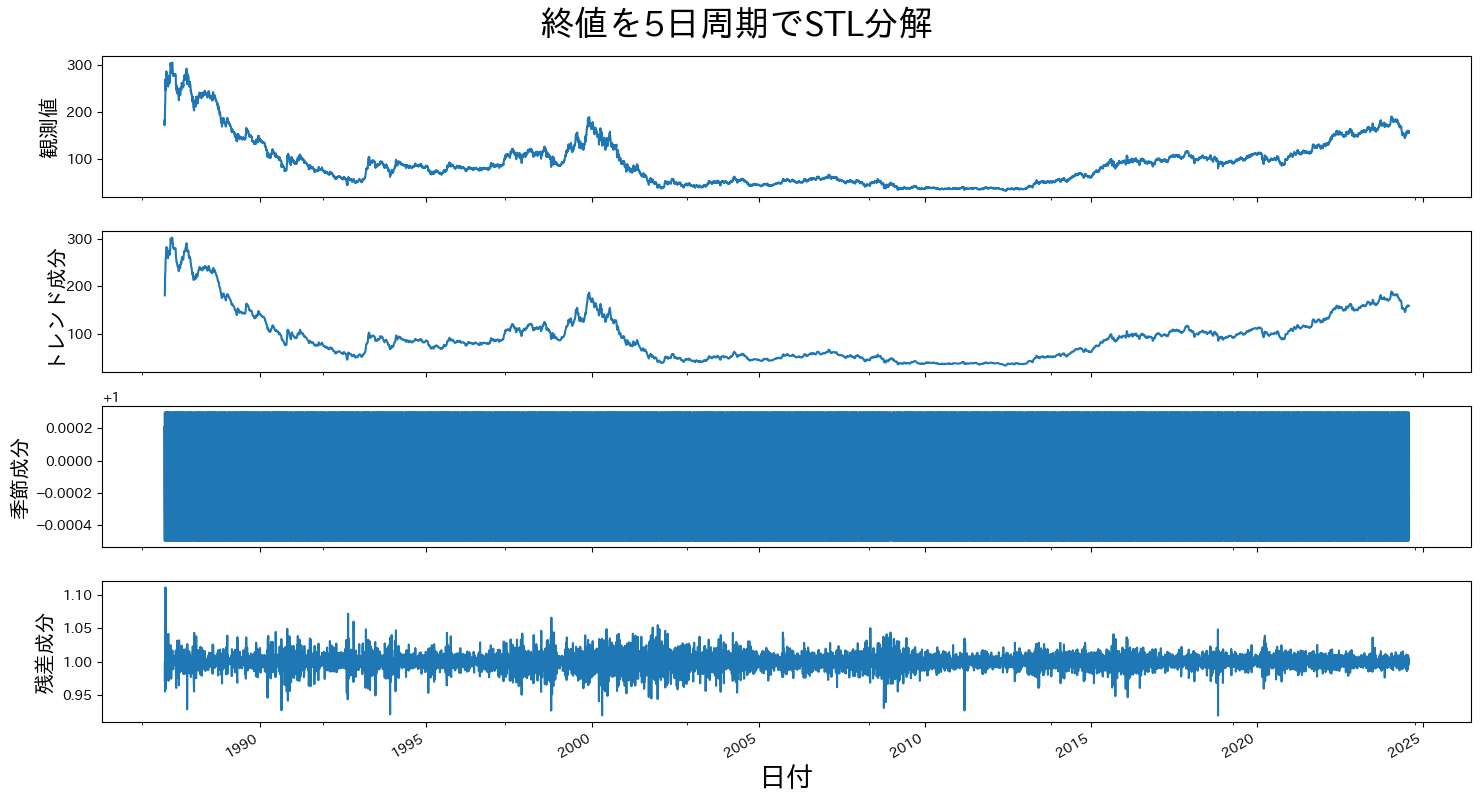

季節性成分の強さ: 0.0006207921387698656


In [12]:
# STL分解
from statsmodels.tsa.seasonal import seasonal_decompose


def stl_decomposition(df, col, period):
  result = seasonal_decompose(df[col], model='multiplicative', period=period)
  fig, ax = plt.subplots(4, 1, figsize=(15, 8), sharex=True)
  fig.suptitle('終値を{}日周期でSTL分解'.format(period), fontsize=25)
  result.observed.plot(ax=ax[0])
  ax[0].set_ylabel('観測値', fontsize=15)
  result.trend.plot(ax=ax[1])
  ax[1].set_ylabel('トレンド成分', fontsize=15)
  result.seasonal.plot(ax=ax[2])
  ax[2].set_ylabel('季節成分', fontsize=15)
  result.resid.plot(ax=ax[3])
  ax[3].set_ylabel('残差成分', fontsize=15)
  for a in ax:
    a.set_xlabel(' ')
    a.label_outer()
  plt.tight_layout(rect=[0, 0, 1, 1])

  plt.xlabel('日付', fontsize=20)
  plt.show()

  seasonal_strength = 1 - np.var(result.resid) / np.var(result.seasonal + result.resid)
  print('季節性成分の強さ:', seasonal_strength)

stl_decomposition(df, 'close', 252)
stl_decomposition(df, 'close', 120)
stl_decomposition(df, 'close', 60)
stl_decomposition(df, 'close', 22)
stl_decomposition(df, 'close', 10)
stl_decomposition(df, 'close', 5)

In [13]:
'''
plt.figure(figsize=(12, 8))
result.seasonal.plot()
plt.xlim('2020-01-01', '2023-12-31')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()
'''

"\nplt.figure(figsize=(12, 8))\nresult.seasonal.plot()\nplt.xlim('2020-01-01', '2023-12-31')\nplt.title('Seasonal Component')\nplt.xlabel('Date')\nplt.ylabel('Value')\nplt.grid()\nplt.show()\n"

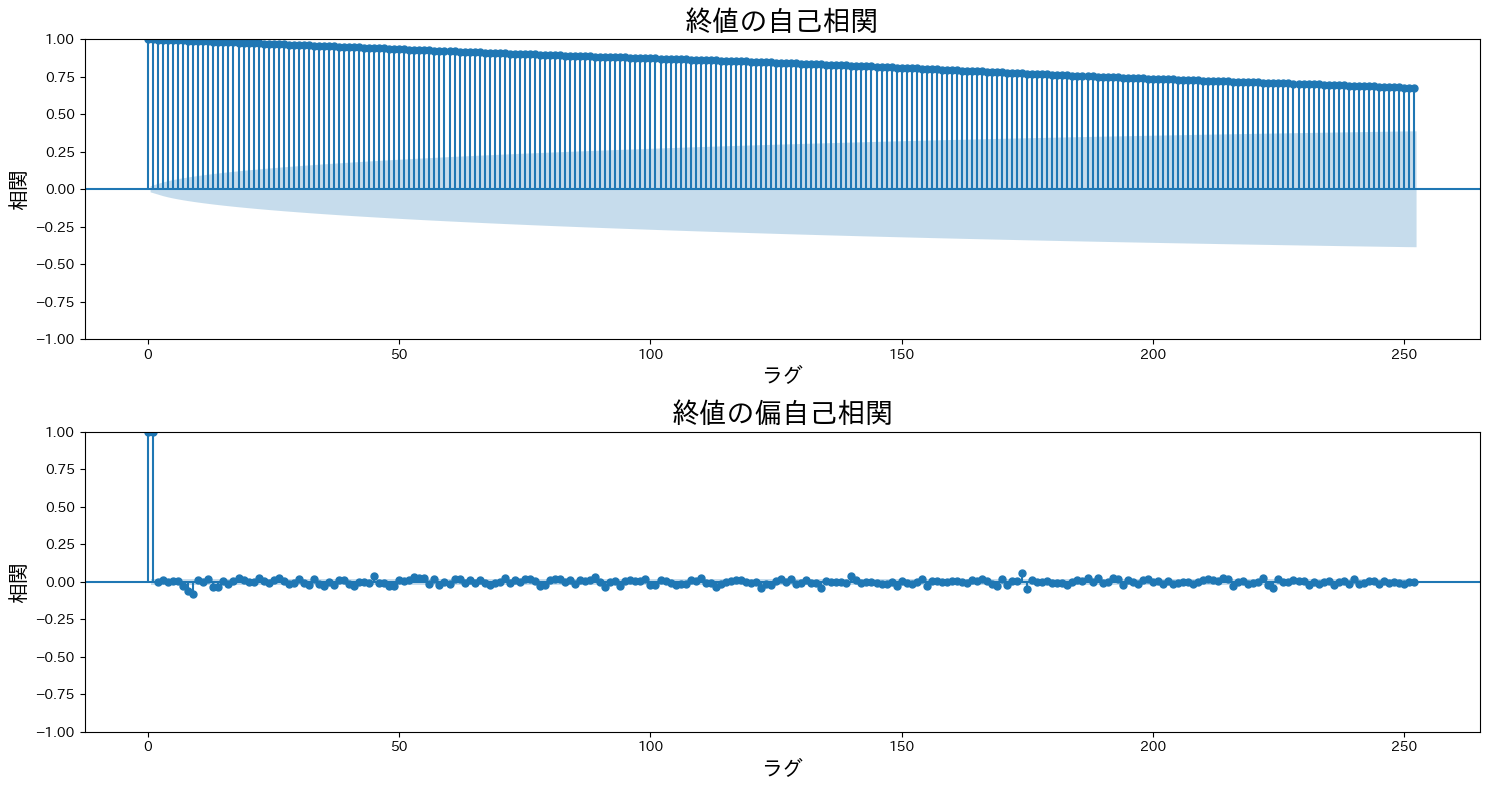

In [14]:
# 自己相関、偏自己相関
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(df['close'], lags=252, ax=ax[0])
ax[0].set_title('終値の自己相関', fontsize=20)
ax[0].set_xlabel('ラグ', fontsize=15)
ax[0].set_ylabel('相関', fontsize=15)
plot_pacf(df['close'], lags=252, ax=ax[1])
ax[1].set_title('終値の偏自己相関', fontsize=20)
ax[1].set_xlabel('ラグ', fontsize=15)
ax[1].set_ylabel('相関', fontsize=15)
plt.tight_layout()
plt.show()



*   ACFがゆっくり減衰→非定常
*   PACFがラグ1のみ1.0



<Figure size 1200x800 with 0 Axes>

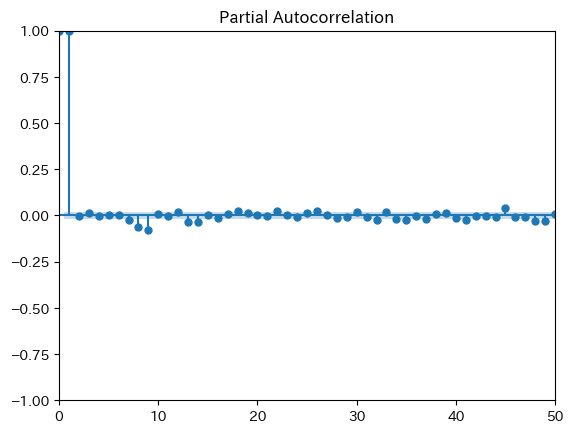

In [15]:
plt.figure(figsize=(12, 8))
plot_pacf(df['close'], lags=252)
plt.xlim(0, 50)
plt.show()

In [16]:
'''
df['log_close'] = np.log(df['close'])
df['diff_log_close'] = df['log_close'].diff()
df
'''

"\ndf['log_close'] = np.log(df['close'])\ndf['diff_log_close'] = df['log_close'].diff()\ndf\n"

In [17]:
# 定常性
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print('The series is stationary')
    else:
        print('The series is not stationary')

ADF Statistic: -3.583192
p-value: 0.006091
Critical Values:
	1%: -3.431
The series is stationary
	5%: -2.862
The series is stationary
	10%: -2.567
The series is stationary


In [18]:
threshold = 3 * df['return'].std()
anomalies = df[np.abs(df['return']) > threshold]
print(anomalies)

            close   open   high    low        volume  return
date                                                        
1987-02-12  182.4  182.4  182.4  182.4  1.280000e+09  0.1625
1987-02-20  210.8  200.0  211.8  200.0  9.022700e+08  0.0750
1987-02-23  235.3  214.7  235.3  211.8  7.987900e+08  0.1162
1987-02-24  270.6  258.8  272.5  257.8  6.054200e+08  0.1500
1987-02-25  252.9  258.8  262.7  252.0  7.339300e+08 -0.0654
...           ...    ...    ...    ...           ...     ...
2018-11-01   81.0   85.5   86.2   81.0  7.335400e+08 -0.1474
2018-11-02   86.4   83.0   86.5   82.8  3.980000e+08  0.0667
2020-02-28  101.2  103.5  104.0  100.9  2.554000e+08 -0.0577
2020-03-19   96.7   90.7   99.8   90.2  3.733500e+08  0.0721
2020-04-06  105.8  104.0  106.8  103.3  1.682500e+08  0.0569

[150 rows x 6 columns]


In [19]:
df_used = df['2019-01-01':]

train = df_used[:'2022-12-31']
valid = df_used['2023-01-01':'2023-07-31']
test = df_used['2023-01-01':'2023-07-31']

<Axes: ylabel='close'>

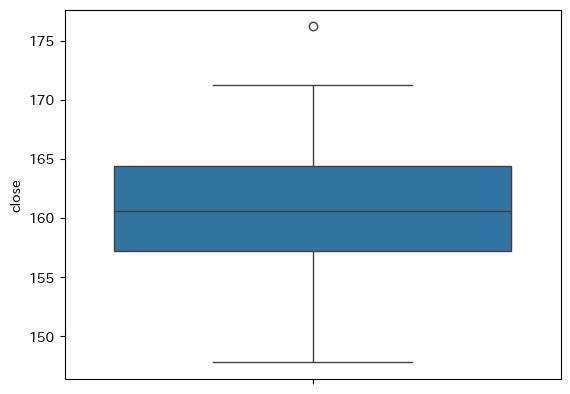

In [20]:
sns.boxplot(valid['close'])

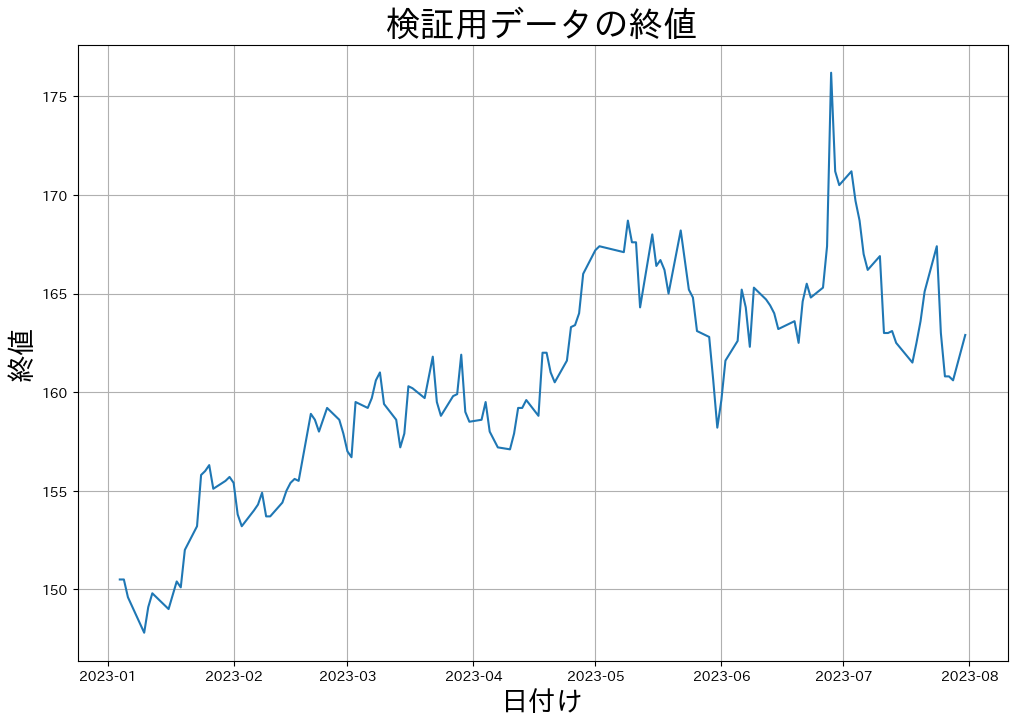

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(valid['close'])
plt.title('検証用データの終値', fontsize=25)
plt.xlabel('日付け', fontsize=20)
plt.ylabel('終値', fontsize=20)
plt.grid()
plt.show()

In [28]:
import pandas as pd

# データを辞書形式で定義（ベースラインを含む）
data = {
    "ステップ": [i for i in range(0, 9)],
    "変更した内容": [
        "ベースライン（全特徴量を使用）",
        "方向性指数（+DI, -DI）を削除",
        "トゥルーレンジ（TR）を削除",
        "相対力指数（RSI）10日,20日を削除",
        "5日移動平均と20日移動平均のデッドクロス以外のクロス成分を削除",
        "ストキャスティクスの%Kを削除",
        "方向性運動指数（+DM, -DM）を削除＋patienceを30→50に変更",
        "指数平滑移動平均（EMA20）を削除",
        "単純移動平均（SMA20）を削除"
    ],
    "訓練MSE": [0.0701, 0.0483, 0.0552, 0.0610, 0.0699, 0.0561, 0.0414, 0.0619, 0.0422],
    "検証MSE": [0.1050, 0.1040, 0.1068, 0.1013, 0.1009, 0.0948, 0.0786, 0.0655, 0.0838]
}

# データフレームを作成
df = pd.DataFrame(data)

# CSVファイルとして保存
df.to_csv("model_comparison_results.csv", index=False, encoding="utf-8-sig")

print("CSVファイルを保存しました：model_comparison_results.csv")


CSVファイルを保存しました：model_comparison_results.csv


In [27]:
df

,ステップ,変更した内容,訓練MSE,検証MSE
0,0,ベースライン（全特徴量を使用）,0.0701,0.1050
1,1,"方向性指数（+DI, -DI）を削除",0.0483,0.1040
2,2,トゥルーレンジ（TR）を削除,0.0552,0.1068
3,3,"相対力指数（RSI）10日,20日を削除",0.0610,0.1013
4,4,5日移動平均と20日移動平均のデッドクロス以外のクロス成分を削除,0.0699,0.1009
5,5,ストキャスティクスの%Kを削除,0.0561,0.0948
6,6,"方向性運動指数（+DM, -DM）を削除＋patienceを30→50に変更",0.0414,0.0786
7,7,指数平滑移動平均（EMA20）を削除,0.0619,0.0655
8,8,単純移動平均（SMA20）を削除,0.0422,0.0838


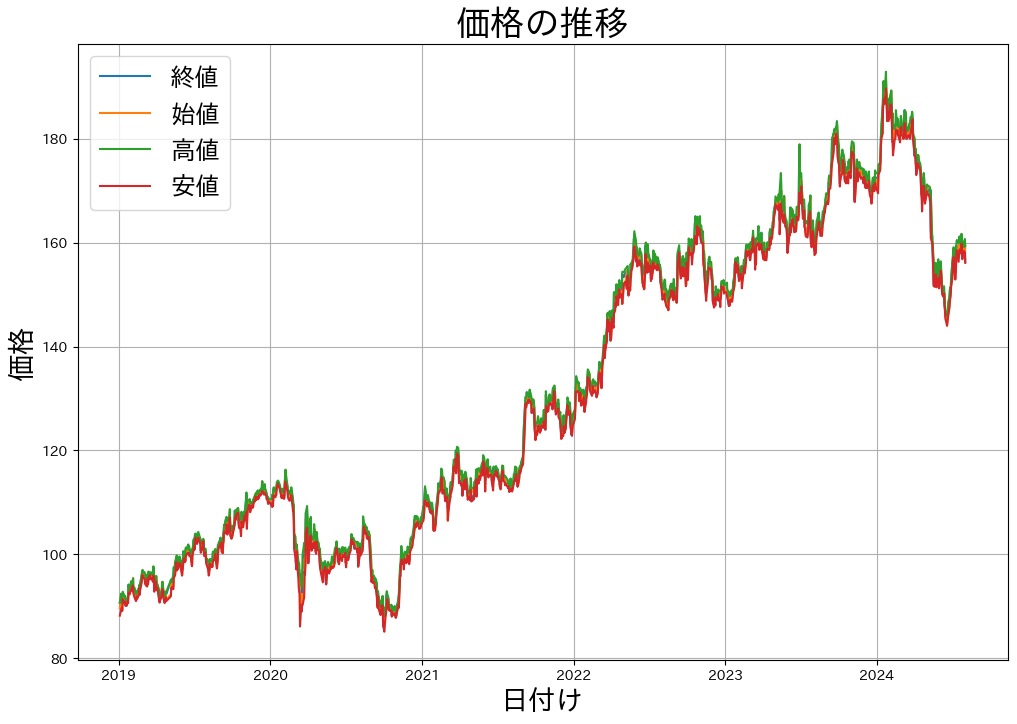

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df_used['close'], label='終値')
plt.plot(df_used['open'], label='始値')
plt.plot(df_used['high'], label='高値')
plt.plot(df_used['low'], label='安値')
plt.title('価格の推移', fontsize=25)
plt.xlabel('日付け', fontsize=20)
plt.ylabel('価格', fontsize=20)
plt.legend(fontsize=18)
plt.grid()
plt.show()

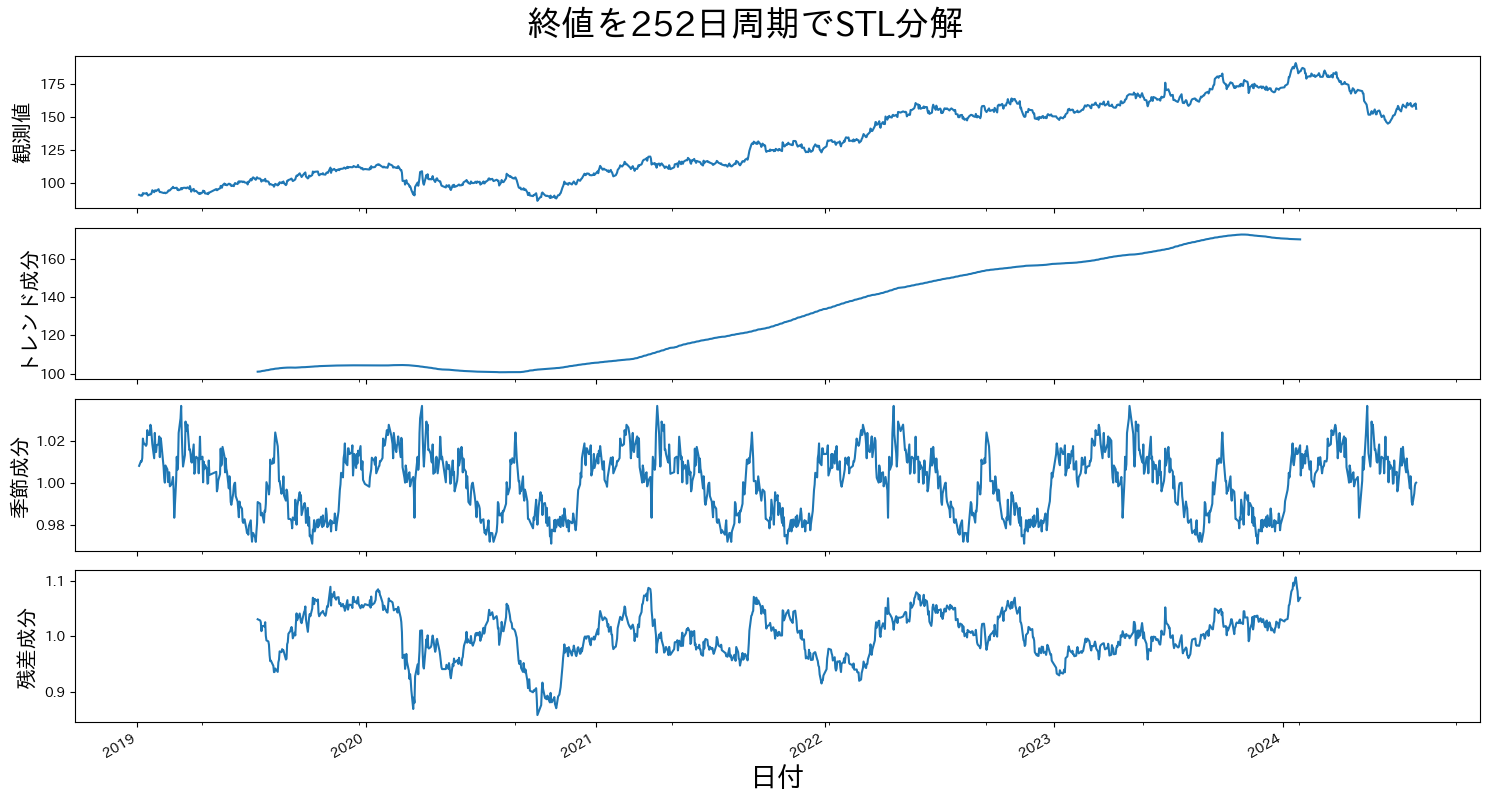

季節性成分の強さ: 0.10854667264370677


In [ ]:
stl_decomposition(df_used, 'close', 252)

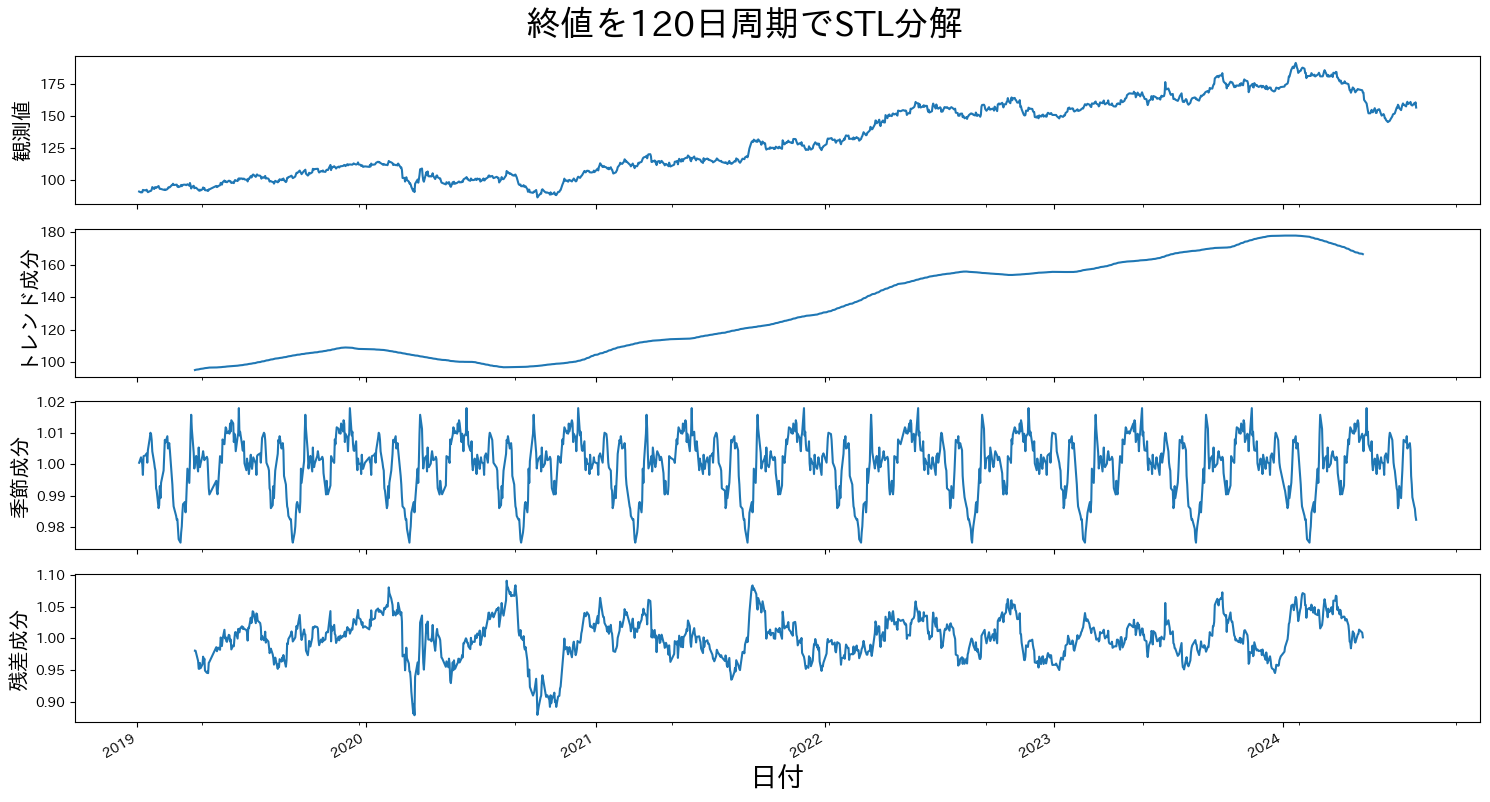

季節性成分の強さ: 0.06799723758901977


In [ ]:
stl_decomposition(df_used, 'close', 120)

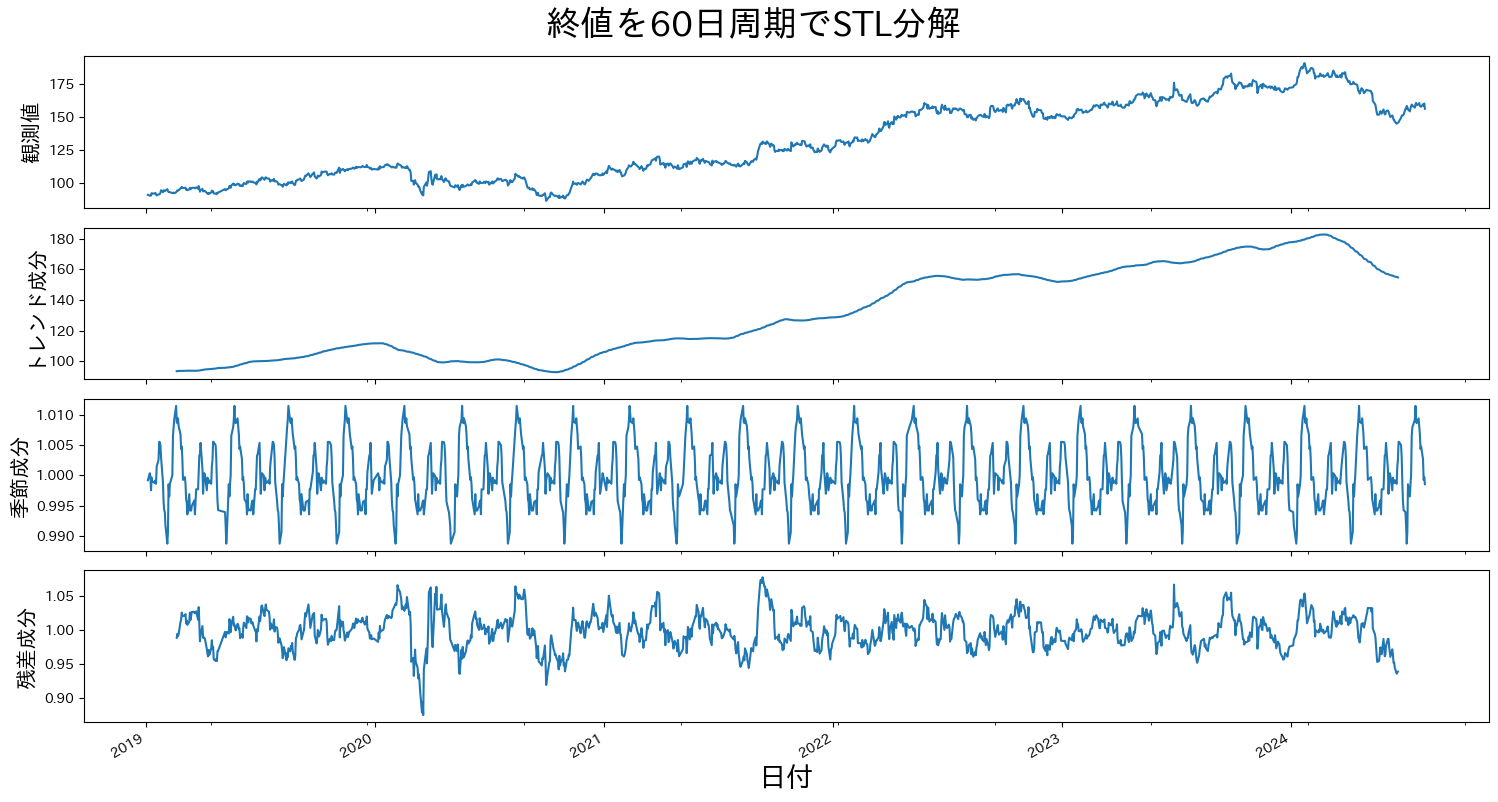

季節性成分の強さ: 0.04084258822754028


In [ ]:
stl_decomposition(df_used, 'close', 60)

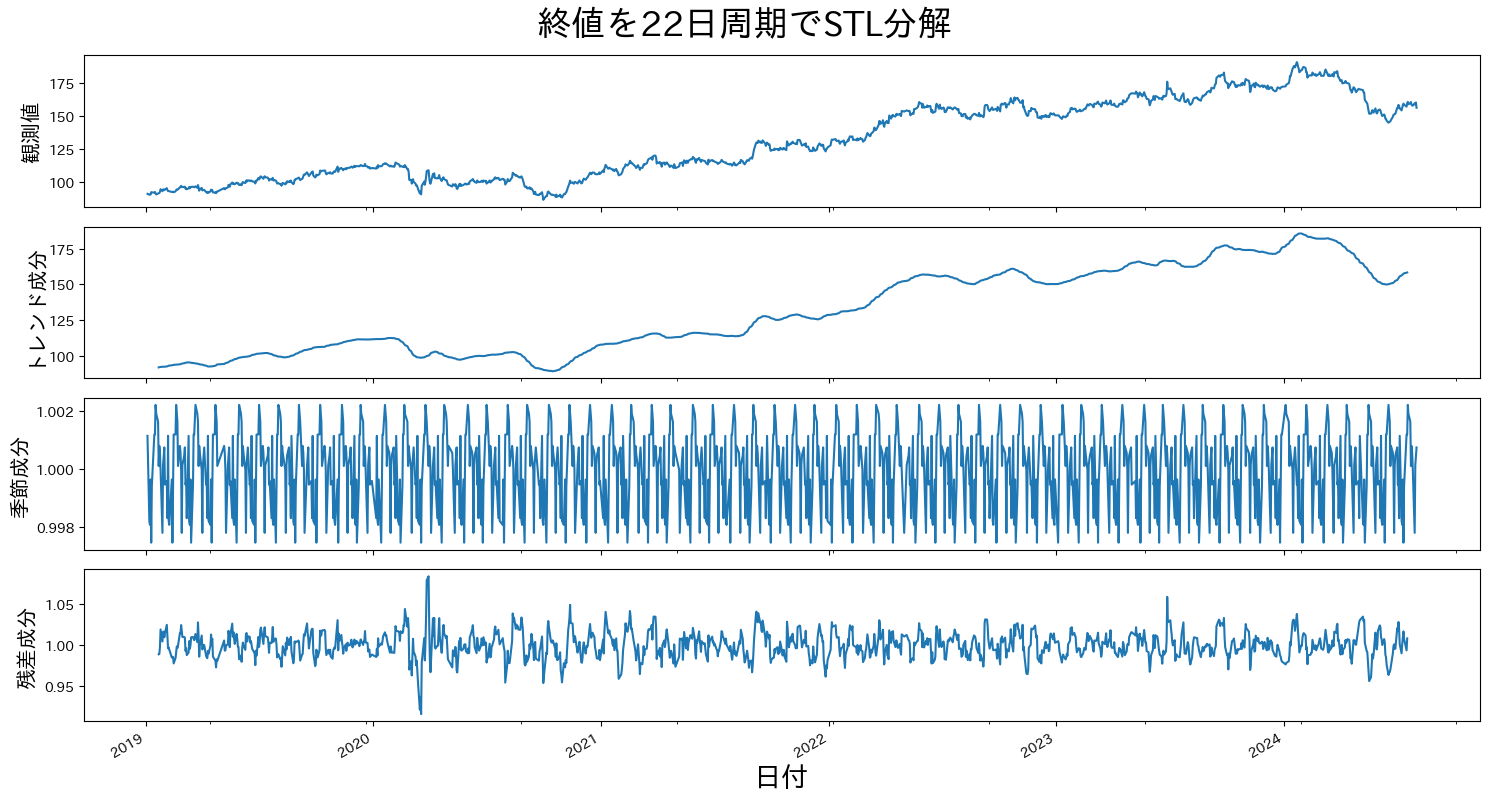

季節性成分の強さ: 0.0073655862966980346


In [ ]:
stl_decomposition(df_used, 'close', 22)

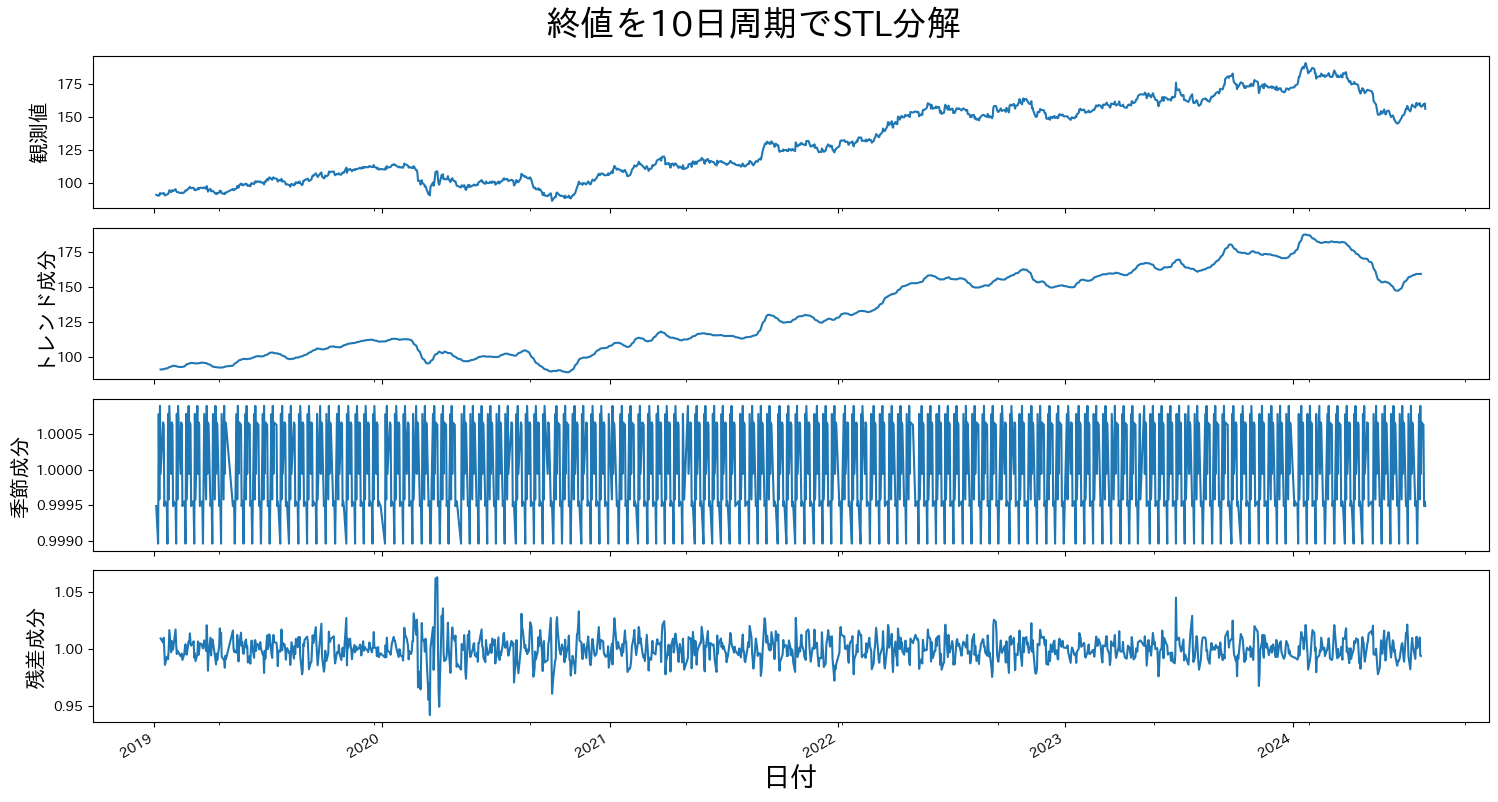

季節性成分の強さ: 0.0037060513919041638


In [ ]:
stl_decomposition(df_used, 'close', 10)

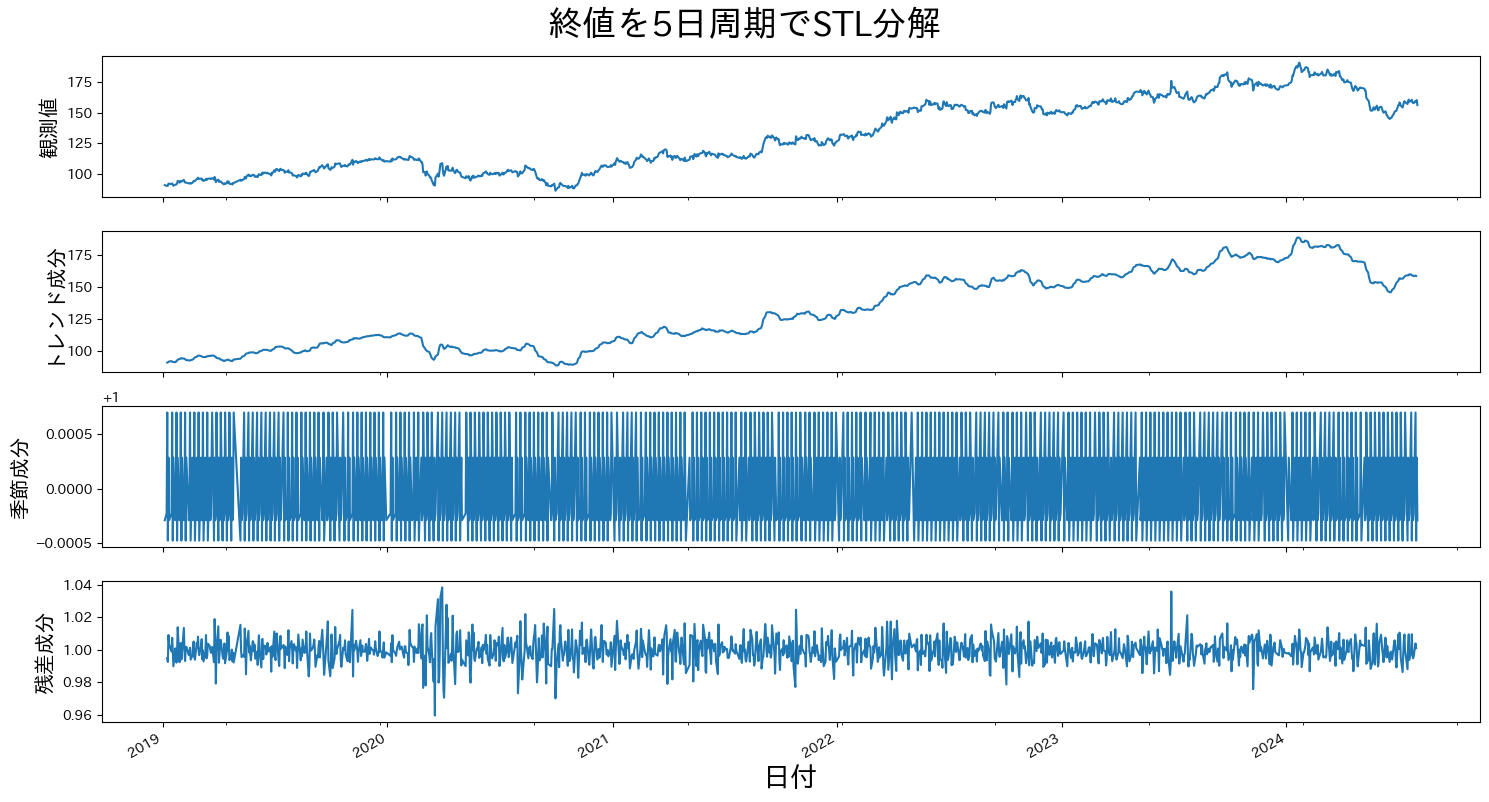

季節性成分の強さ: 0.0031415227923431432


In [ ]:
stl_decomposition(df_used, 'close', 5)

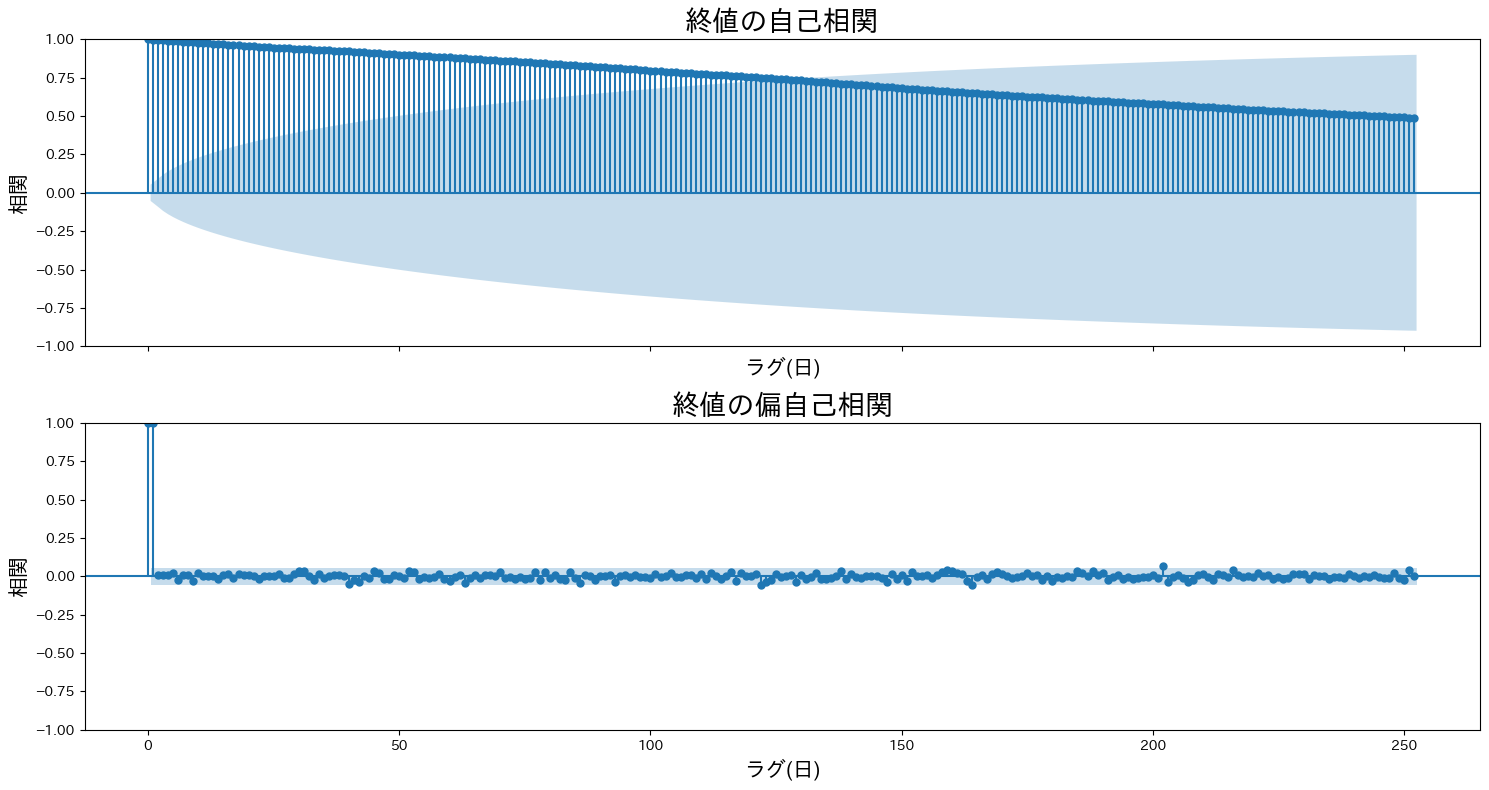

In [ ]:
# 自己相関、偏自己相関

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(df, col, col_name, lags):
  fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
  plot_acf(df[col], lags=lags, ax=ax[0])
  ax[0].set_title('{}の自己相関'.format(col_name), fontsize=20)
  ax[0].set_xlabel('ラグ(日)', fontsize=15)
  ax[0].set_ylabel('相関', fontsize=15)
  plot_pacf(df[col], lags=lags, ax=ax[1])
  ax[1].set_title('{}の偏自己相関'.format(col_name), fontsize=20)
  ax[1].set_xlabel('ラグ(日)', fontsize=15)
  ax[1].set_ylabel('相関', fontsize=15)
  plt.tight_layout()
  plt.show()

plot_acf_pacf(df_used, 'close', '終値', 252)

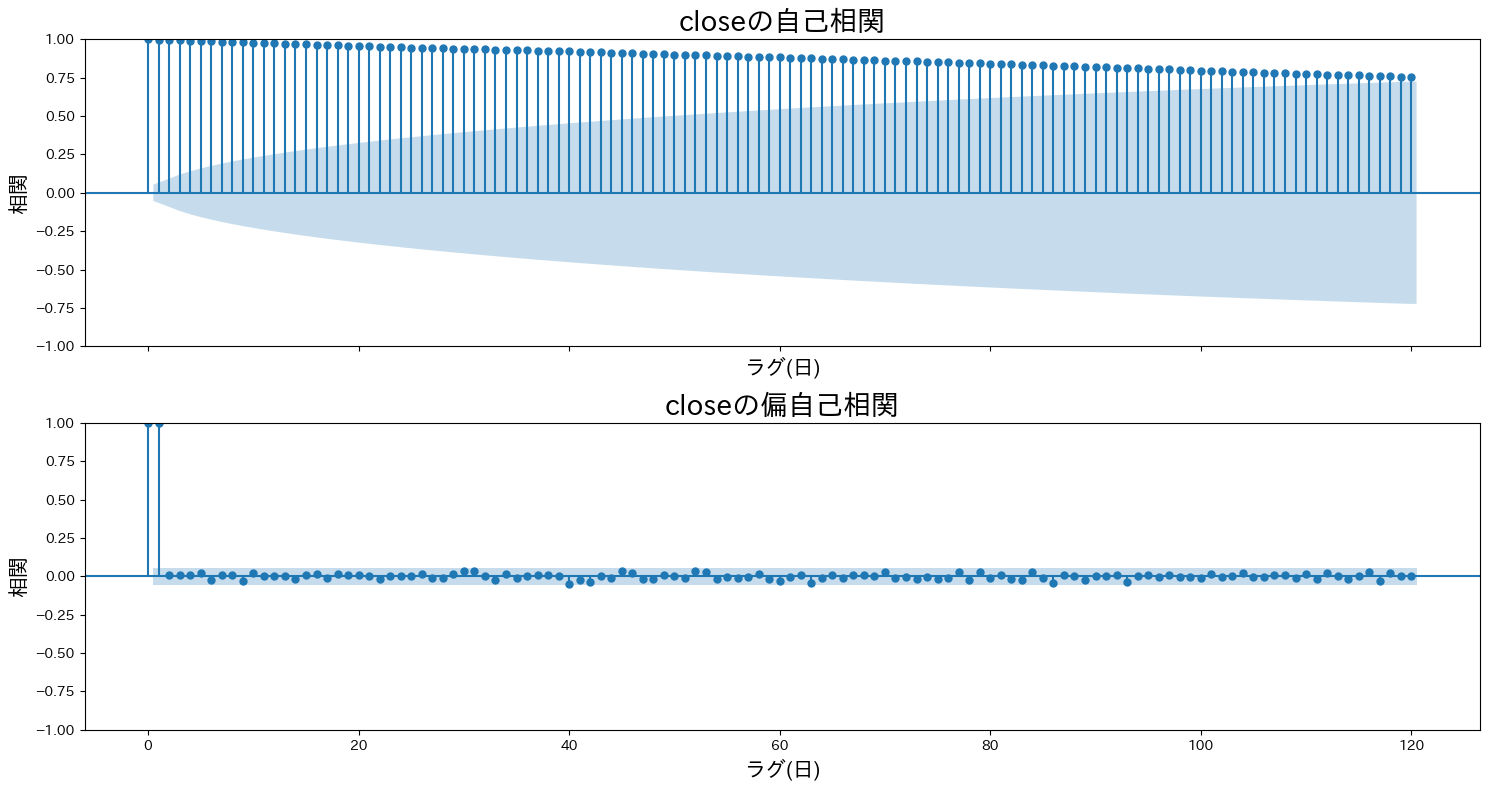

In [ ]:
plot_acf_pacf(df_used, 'close', 120)

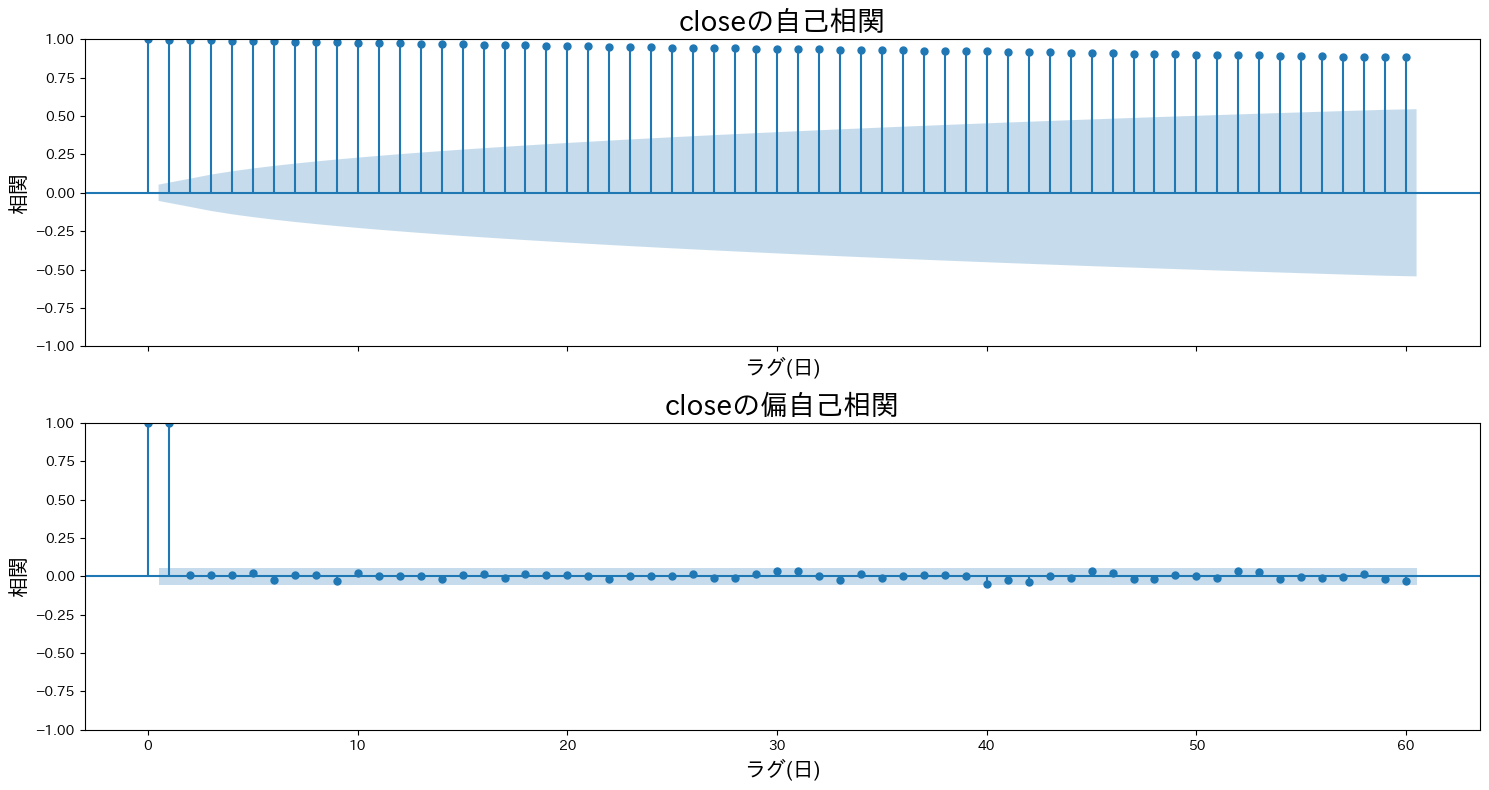

In [ ]:
plot_acf_pacf(df_used, 'close', 60)

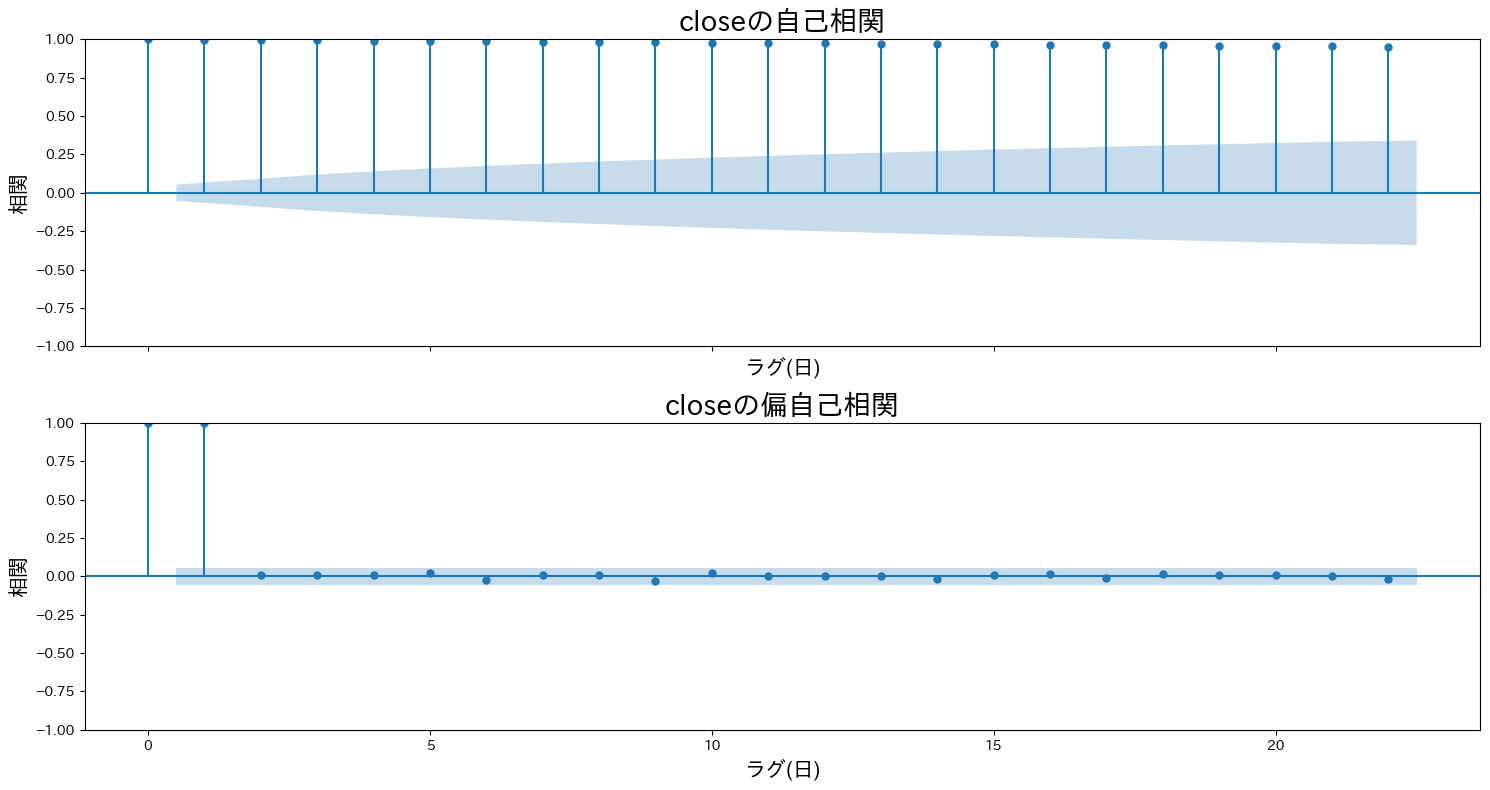

In [ ]:
plot_acf_pacf(df_used, 'close', 22)

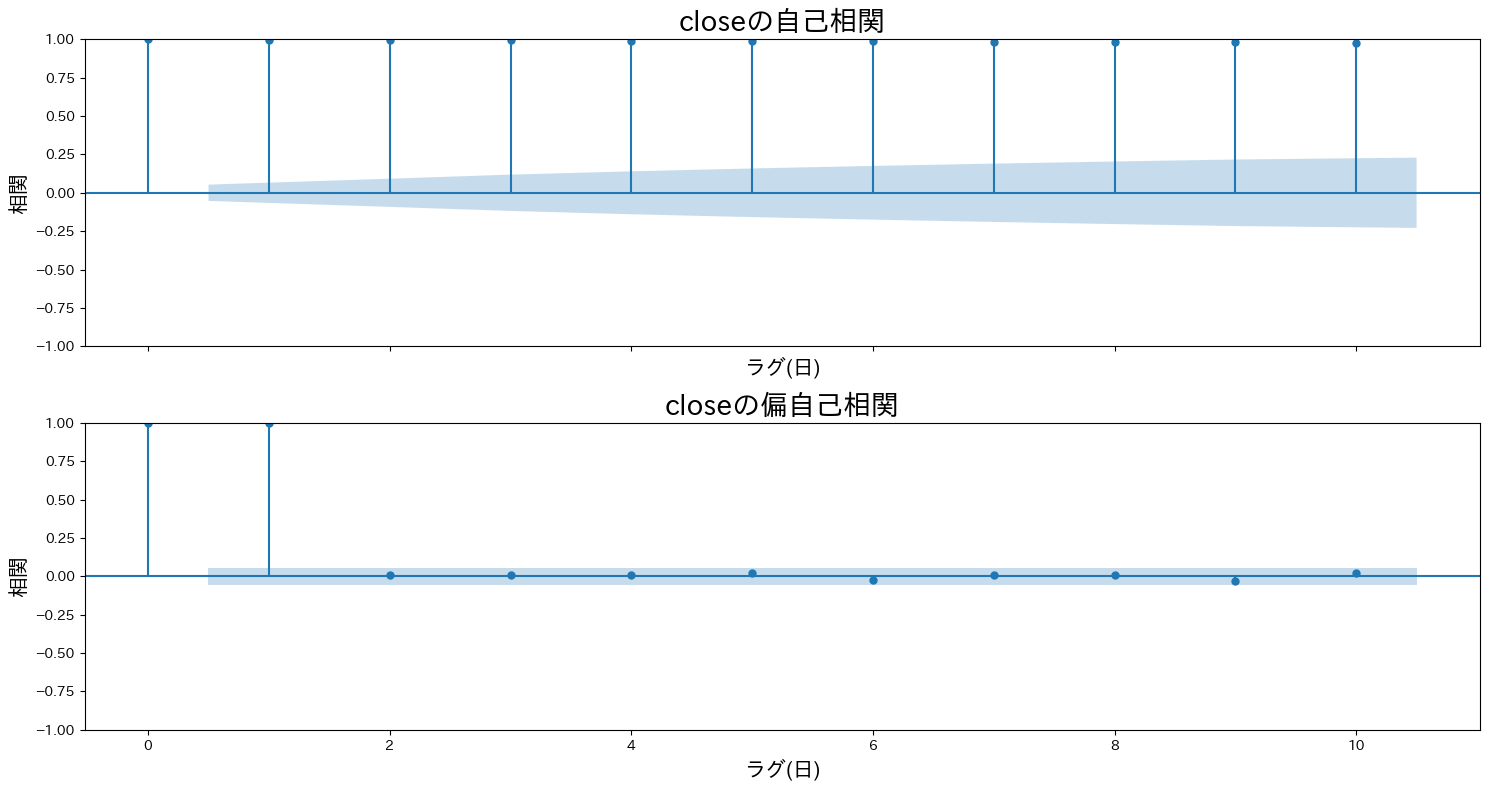

In [ ]:
plot_acf_pacf(df_used, 'close', 10)

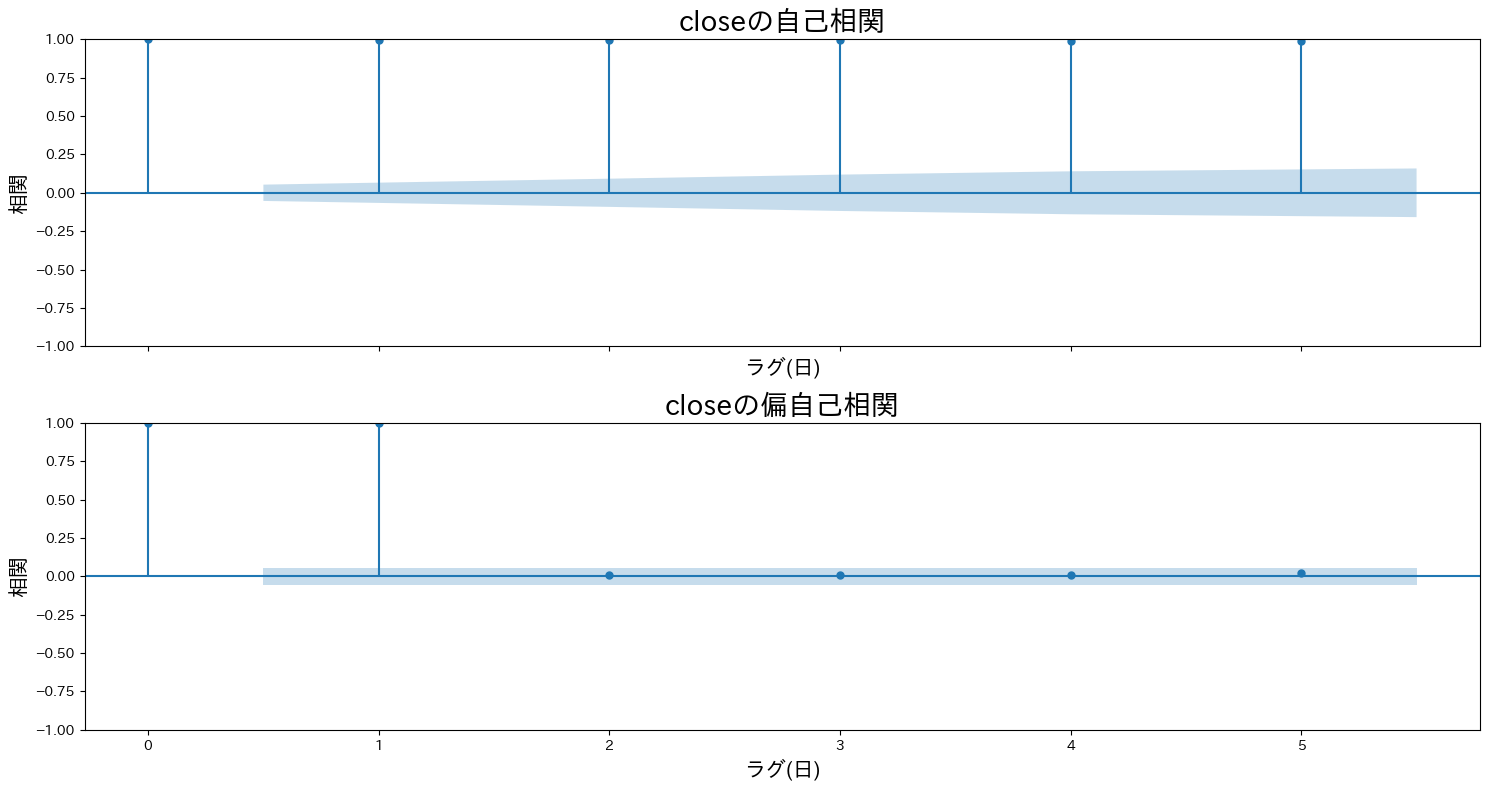

In [ ]:
plot_acf_pacf(df_used, 'close', 5)